# **1. Perkenalan Dataset**


Pada eksperimen ini, digunakan dataset polusi udara yang diperoleh dari public repository untuk keperluan penelitian dan pembelajaran.

**Sumber Dataset**: Dataset diambil dari Kaggle, salah satu platform penyedia dataset terbuka yang populer di kalangan data scientist dan researcher. Dataset ini bersifat publik dan dapat diakses secara gratis untuk tujuan pembelajaran dan riset akademis.

## Dataset: Air Pollution Forecasting (Multivariate LSTM)

**Sumber Dataset**: [Kaggle - LSTM Datasets (Multivariate & Univariate)](https://www.kaggle.com/datasets/rupakroy/lstm-datasets-multivariate-univariate/data)

**Deskripsi Dataset**:
- Dataset ini berisi data polusi udara PM2.5 di Beijing, China
- Data time series dengan interval per jam dari tahun 2010-2014
- Total: **43,800 baris** data (5 tahun × 365 hari × 24 jam)

**Fitur dalam Dataset**:
1. **date**: Tanggal dan waktu pengukuran
2. **pollution**: Konsentrasi PM2.5 (target variable)
3. **dew**: Titik embun (°C)
4. **temp**: Temperatur (°C)
5. **press**: Tekanan atmosfer (hPa)
6. **wnd_dir**: Arah angin (categorical: SE, NW, NE, cv)
7. **wnd_spd**: Kecepatan angin (m/s)
8. **snow**: Jumlah salju kumulatif (jam)
9. **rain**: Jumlah hujan kumulatif (jam)

**Tujuan**:
Membangun model **Bidirectional LSTM (Bi-LSTM)** untuk memprediksi tingkat polusi udara (PM2.5) berdasarkan data historis 24 jam sebelumnya.

# **2. Import Library**

Pada tahap ini, dilakukan import pustaka (library) Python yang diperlukan untuk:
- **Data manipulation**: Pandas dan NumPy untuk mengelola dan memanipulasi data
- **Visualisasi**: Matplotlib dan Seaborn untuk membuat grafik dan visualisasi data
- **Preprocessing**: Scikit-learn untuk normalisasi dan encoding data
- **Deep Learning**: TensorFlow/Keras untuk membangun model Bi-LSTM

Library-library ini merupakan tools fundamental dalam pengembangan model machine learning dan deep learning, khususnya untuk time series forecasting dengan neural networks.

In [1]:
# Import library untuk data manipulation dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Import library untuk deep learning (Bi-LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Setting untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Library berhasil diimport!")

✓ Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, dataset dimuat ke dalam environment Python menggunakan library Pandas. Dataset dalam format CSV dibaca dan dikonversi menjadi DataFrame untuk memudahkan manipulasi data.

Langkah-langkah yang dilakukan:
1. **Membaca file CSV**: Menggunakan `pd.read_csv()` untuk memuat data
2. **Verifikasi struktur**: Memeriksa dimensi dataset (jumlah baris dan kolom)
3. **Preview data**: Menampilkan beberapa baris pertama untuk memahami struktur dan konten data

Proses ini penting untuk memastikan data berhasil dimuat dengan benar sebelum melanjutkan ke tahap analisis dan preprocessing.

In [2]:
# Memuat dataset
dataset_path = r'../Air Pollution Forecasting_raw/LSTM-Multivariate_pollution.csv'
df = pd.read_csv(dataset_path)

print("=" * 60)
print("INFORMASI DATASET")
print("=" * 60)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n" + "=" * 60)
print("5 BARIS PERTAMA DATASET")
print("=" * 60)
df.head()

INFORMASI DATASET
Jumlah baris: 43800
Jumlah kolom: 9

5 BARIS PERTAMA DATASET


,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dan pola dalam dataset secara mendalam.

**Tujuan EDA**:
- Memahami distribusi dan statistik deskriptif dari setiap variabel
- Mengidentifikasi missing values, outliers, dan anomali data
- Menganalisis korelasi antar variabel
- Memvisualisasikan pola temporal dalam time series
- Menentukan strategi preprocessing yang tepat

**Analisis yang dilakukan**:
1. **Statistik Deskriptif**: Mean, median, std, min/max setiap variabel
2. **Data Quality Check**: Missing values dan duplikasi
3. **Visualisasi Distribusi**: Histogram untuk setiap variabel numerik
4. **Correlation Analysis**: Heatmap untuk melihat hubungan antar variabel
5. **Time Series Plot**: Visualisasi pola temporal pollution level

EDA memberikan insight yang sangat penting untuk memahami data dan menginformasikan keputusan preprocessing selanjutnya.

In [3]:
# 1. Informasi Umum Dataset
print("=" * 60)
print("INFORMASI UMUM DATASET")
print("=" * 60)
print(df.info())

print("\n" + "=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("TIPE DATA SETIAP KOLOM")
print("=" * 60)
print(df.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

print("\n" + "=" * 60)
print("DATA DUPLIKAT")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

INFORMASI UMUM DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB
None

STATISTIK DESKRIPTIF
          pollution           dew          temp         press       wnd_spd  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -

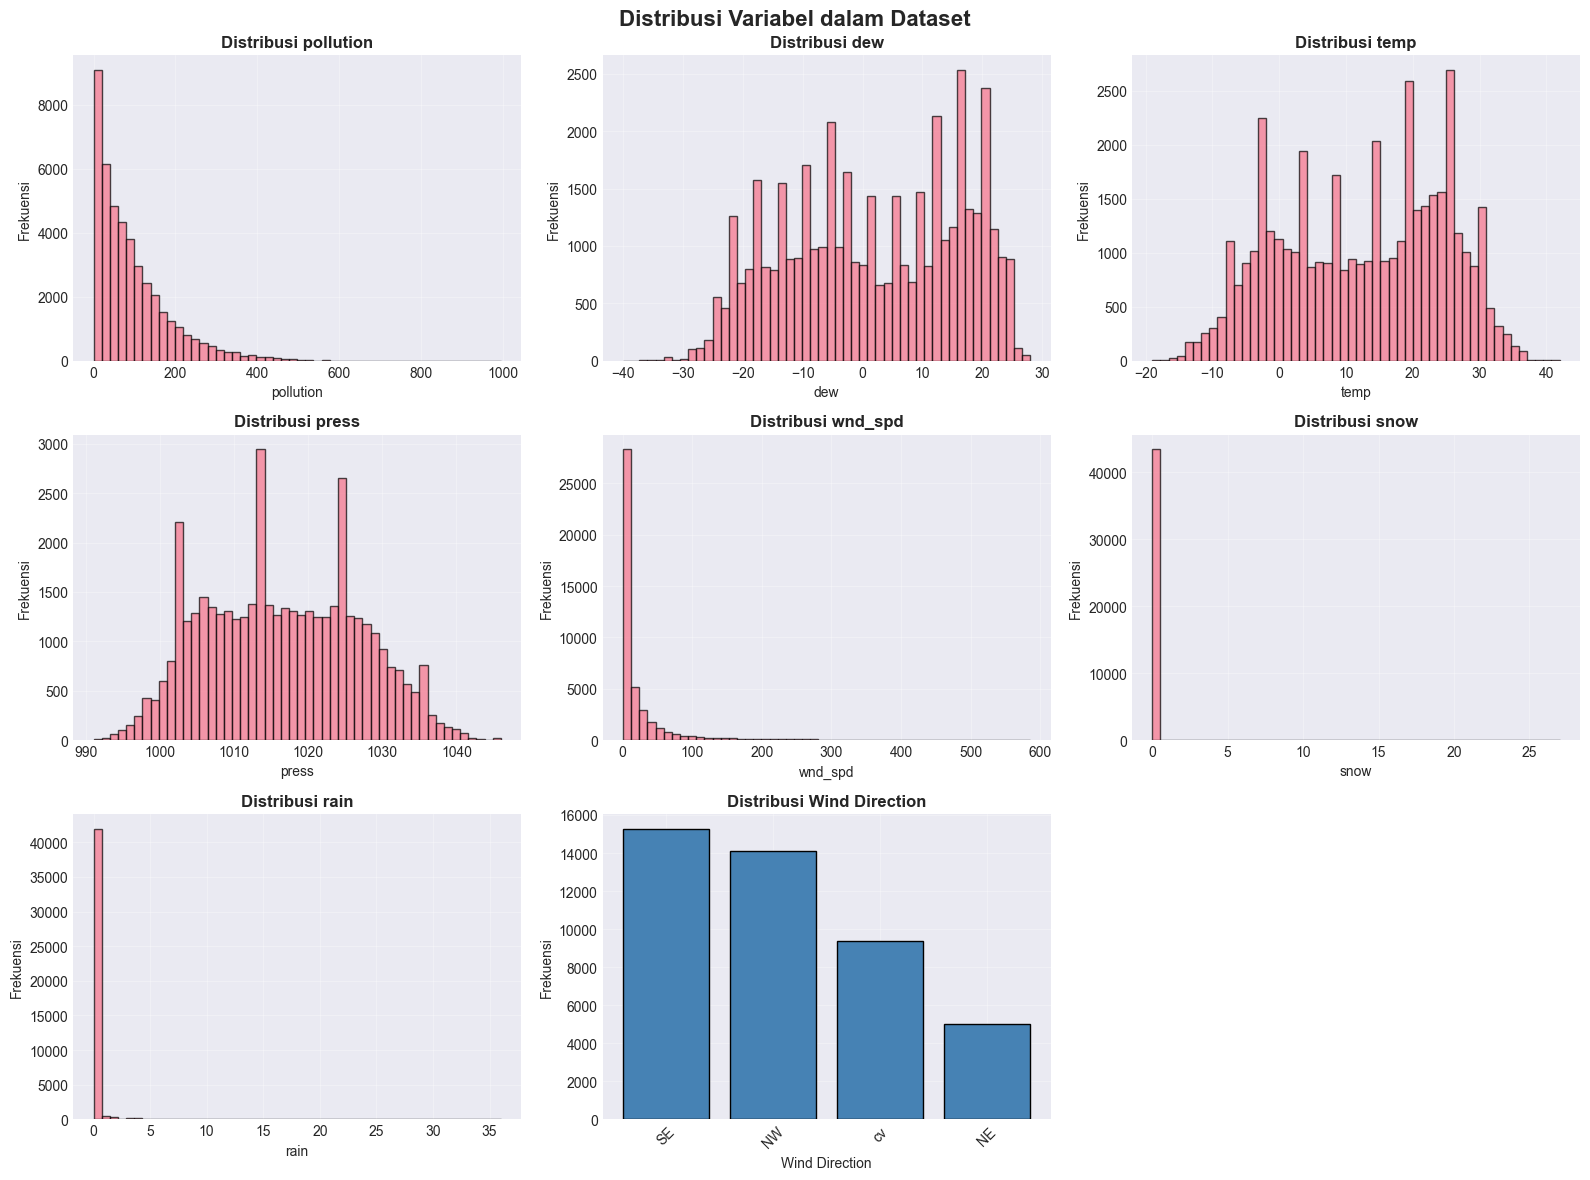


✓ Visualisasi distribusi selesai!


In [4]:
# Visualisasi distribusi variabel numerik
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Distribusi Variabel dalam Dataset', fontsize=16, fontweight='bold')

numeric_cols = ['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain']

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribusi {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frekuensi')
    axes[row, col_idx].grid(True, alpha=0.3)

# Visualisasi untuk wind direction (categorical)
wnd_dir_counts = df['wnd_dir'].value_counts()
axes[2, 1].bar(range(len(wnd_dir_counts)), wnd_dir_counts.values, color='steelblue', edgecolor='black')
axes[2, 1].set_title('Distribusi Wind Direction', fontweight='bold')
axes[2, 1].set_xlabel('Wind Direction')
axes[2, 1].set_ylabel('Frekuensi')
axes[2, 1].set_xticks(range(len(wnd_dir_counts)))
axes[2, 1].set_xticklabels(wnd_dir_counts.index, rotation=45)
axes[2, 1].grid(True, alpha=0.3)

# Hapus subplot kosong
axes[2, 2].remove()

plt.tight_layout()
plt.show()

print("\n✓ Visualisasi distribusi selesai!")

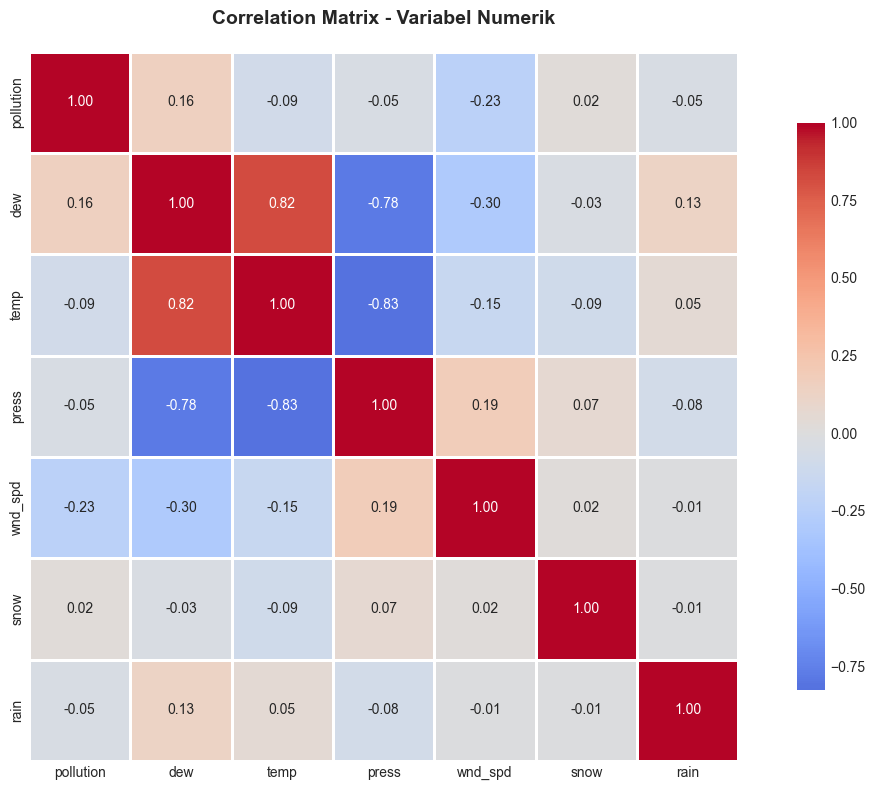


✓ Visualisasi korelasi selesai!


In [5]:
# Visualisasi Correlation Matrix
plt.figure(figsize=(12, 8))

# Hitung korelasi hanya untuk kolom numerik (exclude wnd_dir yang categorical)
numeric_data = df[['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain']]
correlation_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Variabel Numerik', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Visualisasi korelasi selesai!")

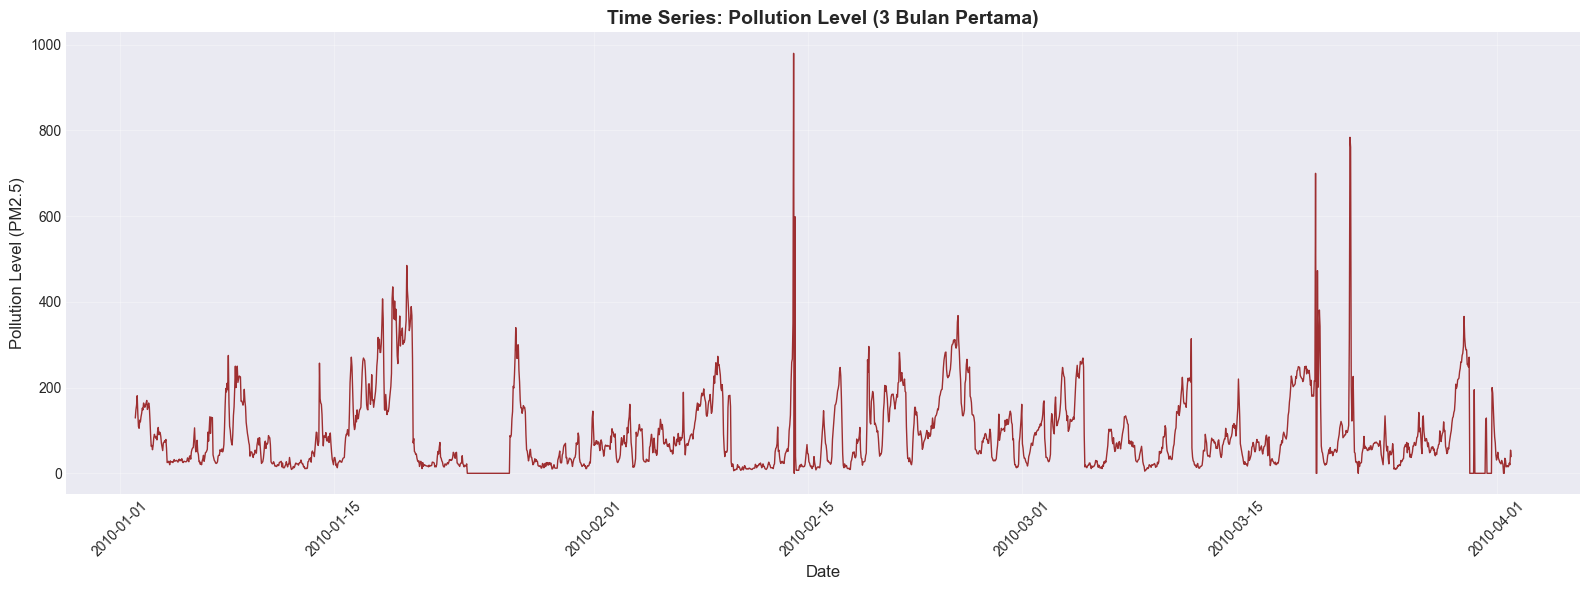


✓ Visualisasi time series selesai!


In [6]:
# Visualisasi Time Series - Pollution Level
df['date'] = pd.to_datetime(df['date'])

# Ambil sample data untuk visualisasi (3 bulan pertama)
sample_df = df.head(2160)  # 24 hours * 30 days * 3 months

plt.figure(figsize=(16, 6))
plt.plot(sample_df['date'], sample_df['pollution'], linewidth=1, alpha=0.8, color='darkred')
plt.title('Time Series: Pollution Level (3 Bulan Pertama)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pollution Level (PM2.5)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✓ Visualisasi time series selesai!")

# **5. Data Preprocessing**

Pada tahap ini, dilakukan **data preprocessing** yang merupakan langkah kritis untuk mempersiapkan data sebelum digunakan dalam model Bidirectional LSTM. Preprocessing yang baik akan meningkatkan performa dan akurasi model secara signifikan.

**Mengapa Preprocessing Penting?**
- Data mentah sering mengandung noise, missing values, dan skala yang tidak konsisten
- Neural networks seperti LSTM sangat sensitif terhadap skala input
- Time series data memerlukan format khusus (sequences) untuk LSTM
- Data kategorikal perlu dikonversi ke format numerik

**Tahapan Preprocessing yang Dilakukan**:

1. **Handling Missing Values**: Menangani data yang hilang agar tidak mengganggu training
2. **Feature Engineering**: Ekstraksi fitur temporal (hour, day, month, dayofweek) untuk menangkap pola periodik
3. **Encoding Categorical Variables**: Konversi wind direction (SE, NW, NE, cv) ke format numerik menggunakan Label Encoder
4. **Normalization**: Scaling semua fitur ke range [0,1] menggunakan MinMaxScaler untuk mempercepat konvergensi model
5. **Sequence Creation**: Membuat sequences time series (24 timesteps) sebagai input untuk LSTM
6. **Train-Test Split**: Membagi data menjadi training dan testing set dengan mempertahankan urutan temporal

Setiap tahapan dirancang khusus untuk memaksimalkan kemampuan model Bi-LSTM dalam mempelajari pola temporal dan dependencies dalam data polusi udara.

In [7]:
"""
==========================================
DATA PREPROCESSING UNTUK BI-LSTM MODEL
==========================================
Tahapan preprocessing yang dilakukan:
1. Handling Missing Values
2. Feature Engineering (extract time features)
3. Encoding Categorical Variables
4. Normalization dengan MinMaxScaler
5. Creating Sequences untuk LSTM
6. Train-Test Split
"""

print("=" * 60)
print("MULAI PREPROCESSING DATA")
print("=" * 60)

# 1. Handle Missing Values
print("\n[1/6] Handling Missing Values...")
print(f"Missing values sebelum: {df.isnull().sum().sum()}")

# Drop rows dengan missing values pada target variable (pollution)
df_clean = df.dropna(subset=['pollution']).copy()

# Fill missing values pada fitur lain dengan forward fill
df_clean = df_clean.fillna(method='ffill')
df_clean = df_clean.fillna(method='bfill')

print(f"Missing values sesudah: {df_clean.isnull().sum().sum()}")
print(f"Jumlah data: {len(df_clean)} baris")

# 2. Feature Engineering - Extract Time Features
print("\n[2/6] Feature Engineering - Extracting Time Features...")
df_clean['hour'] = df_clean['date'].dt.hour
df_clean['day'] = df_clean['date'].dt.day
df_clean['month'] = df_clean['date'].dt.month
df_clean['dayofweek'] = df_clean['date'].dt.dayofweek

print(f"✓ Time features berhasil ditambahkan: hour, day, month, dayofweek")

# 3. Encoding Categorical Variable (wnd_dir)
print("\n[3/6] Encoding Categorical Variable...")
label_encoder = LabelEncoder()
df_clean['wnd_dir_encoded'] = label_encoder.fit_transform(df_clean['wnd_dir'])

print(f"✓ Wind direction encoded: {df_clean['wnd_dir'].nunique()} kategori")
print(f"   Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# 4. Prepare Features dan Target
print("\n[4/6] Preparing Features and Target...")

# Pilih kolom features (exclude date dan wnd_dir original)
feature_columns = ['dew', 'temp', 'press', 'wnd_dir_encoded', 'wnd_spd', 
                   'snow', 'rain', 'hour', 'day', 'month', 'dayofweek']
target_column = 'pollution'

# Ekstrak features dan target
features = df_clean[feature_columns].values
target = df_clean[target_column].values.reshape(-1, 1)

print(f"✓ Features shape: {features.shape}")
print(f"✓ Target shape: {target.shape}")

print("\n" + "=" * 60)
print("PREPROCESSING SELESAI!")
print("=" * 60)

MULAI PREPROCESSING DATA

[1/6] Handling Missing Values...
Missing values sebelum: 0
Missing values sesudah: 0
Jumlah data: 43800 baris

[2/6] Feature Engineering - Extracting Time Features...
✓ Time features berhasil ditambahkan: hour, day, month, dayofweek

[3/6] Encoding Categorical Variable...
✓ Wind direction encoded: 4 kategori
   Mapping: {'NE': 0, 'NW': 1, 'SE': 2, 'cv': 3}

[4/6] Preparing Features and Target...
✓ Features shape: (43800, 11)
✓ Target shape: (43800, 1)

PREPROCESSING SELESAI!


C:\Users\user\AppData\Local\Temp\ipykernel_3348\2058216959.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_3348\2058216959.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='bfill')


In [8]:
"""
==========================================
NORMALIZATION DAN SEQUENCE CREATION
==========================================
"""

print("=" * 60)
print("NORMALIZATION & SEQUENCE CREATION")
print("=" * 60)

# 5. Normalization dengan MinMaxScaler
print("\n[5/6] Normalizing Data dengan MinMaxScaler...")

# Create scalers
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Fit dan transform
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target)

print(f"✓ Features scaled shape: {features_scaled.shape}")
print(f"✓ Target scaled shape: {target_scaled.shape}")
print(f"✓ Scaled range: [0, 1]")

# 6. Create Sequences untuk LSTM
print("\n[6/6] Creating Sequences untuk Bi-LSTM...")

def create_sequences(features, target, time_steps=24):
    """
    Create sequences untuk time series prediction
    
    Parameters:
    - features: array fitur yang sudah di-scale
    - target: array target yang sudah di-scale
    - time_steps: jumlah timesteps untuk sequence (default: 24 hours)
    
    Returns:
    - X_seq: sequences features
    - y_seq: corresponding targets
    """
    X_seq, y_seq = [], []
    
    for i in range(len(features) - time_steps):
        X_seq.append(features[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    
    return np.array(X_seq), np.array(y_seq)

# Define time steps (menggunakan 24 jam terakhir untuk prediksi 1 jam ke depan)
TIME_STEPS = 24

# Create sequences
X_sequences, y_sequences = create_sequences(features_scaled, target_scaled, TIME_STEPS)

print(f"✓ Time steps: {TIME_STEPS} hours")
print(f"✓ X_sequences shape: {X_sequences.shape}")
print(f"   (samples, timesteps, features) = ({X_sequences.shape[0]}, {X_sequences.shape[1]}, {X_sequences.shape[2]})")
print(f"✓ y_sequences shape: {y_sequences.shape}")

print("\n" + "=" * 60)
print("SEQUENCE CREATION SELESAI!")
print("=" * 60)

NORMALIZATION & SEQUENCE CREATION

[5/6] Normalizing Data dengan MinMaxScaler...
✓ Features scaled shape: (43800, 11)
✓ Target scaled shape: (43800, 1)
✓ Scaled range: [0, 1]

[6/6] Creating Sequences untuk Bi-LSTM...
✓ Time steps: 24 hours
✓ X_sequences shape: (43776, 24, 11)
   (samples, timesteps, features) = (43776, 24, 11)
✓ y_sequences shape: (43776, 1)

SEQUENCE CREATION SELESAI!


In [9]:
"""
==========================================
TRAIN-TEST SPLIT
==========================================
"""

print("=" * 60)
print("SPLITTING DATA")
print("=" * 60)

# Split data menjadi train dan test set (80:20)
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, 
    y_sequences, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    shuffle=False  # Penting untuk time series, jangan shuffle
)

print(f"\nTrain-Test Split Ratio: {int((1-TEST_SIZE)*100)}% : {int(TEST_SIZE*100)}%")
print(f"Random State: {RANDOM_STATE}")
print(f"Shuffle: False (preserved temporal order)")

print(f"\n✓ X_train shape: {X_train.shape}")
print(f"✓ X_test shape: {X_test.shape}")
print(f"✓ y_train shape: {y_train.shape}")
print(f"✓ y_test shape: {y_test.shape}")

# Summary
print("\n" + "=" * 60)
print("SUMMARY - DATA SIAP UNTUK MODELING")
print("=" * 60)
print(f"Total samples: {len(X_sequences):,}")
print(f"Training samples: {len(X_train):,} ({len(X_train)/len(X_sequences)*100:.1f}%)")
print(f"Testing samples: {len(X_test):,} ({len(X_test)/len(X_sequences)*100:.1f}%)")
print(f"\nInput shape untuk Bi-LSTM: (timesteps={X_train.shape[1]}, features={X_train.shape[2]})")
print(f"Output shape: {y_train.shape[1]} (pollution level)")

print("\n✅ DATA PREPROCESSING SELESAI - SIAP UNTUK MODELING BI-LSTM!")
print("=" * 60)

SPLITTING DATA

Train-Test Split Ratio: 80% : 20%
Random State: 42
Shuffle: False (preserved temporal order)

✓ X_train shape: (35020, 24, 11)
✓ X_test shape: (8756, 24, 11)
✓ y_train shape: (35020, 1)
✓ y_test shape: (8756, 1)

SUMMARY - DATA SIAP UNTUK MODELING
Total samples: 43,776
Training samples: 35,020 (80.0%)
Testing samples: 8,756 (20.0%)

Input shape untuk Bi-LSTM: (timesteps=24, features=11)
Output shape: 1 (pollution level)

✅ DATA PREPROCESSING SELESAI - SIAP UNTUK MODELING BI-LSTM!


In [10]:
# Simpan data yang sudah diproses untuk modeling
import pickle
import os

# Create directory untuk menyimpan preprocessed data
output_dir = r'Air Pollution Forecasting_preprocessing'
os.makedirs(output_dir, exist_ok=True)

# Save numpy arrays
np.save(os.path.join(output_dir, 'X_train.npy'), X_train)
np.save(os.path.join(output_dir, 'X_test.npy'), X_test)
np.save(os.path.join(output_dir, 'y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'y_test.npy'), y_test)

# Save scalers untuk inverse transform nanti
with open(os.path.join(output_dir, 'scaler_features.pkl'), 'wb') as f:
    pickle.dump(scaler_features, f)
    
with open(os.path.join(output_dir, 'scaler_target.pkl'), 'wb') as f:
    pickle.dump(scaler_target, f)

# Save label encoder
with open(os.path.join(output_dir, 'label_encoder.pkl'), 'wb') as f:
    pickle.dump(label_encoder, f)

# Save metadata
metadata = {
    'time_steps': TIME_STEPS,
    'feature_columns': feature_columns,
    'target_column': target_column,
    'train_size': len(X_train),
    'test_size': len(X_test),
    'input_shape': (X_train.shape[1], X_train.shape[2]),
    'test_split_ratio': TEST_SIZE,
    'random_state': RANDOM_STATE
}

with open(os.path.join(output_dir, 'metadata.pkl'), 'wb') as f:
    pickle.dump(metadata, f)

print("=" * 60)
print("DATA TERSIMPAN!")
print("=" * 60)
print(f"\nLokasi: {output_dir}")
print("\nFile yang tersimpan:")
print("  ✓ X_train.npy")
print("  ✓ X_test.npy")
print("  ✓ y_train.npy")
print("  ✓ y_test.npy")
print("  ✓ scaler_features.pkl")
print("  ✓ scaler_target.pkl")
print("  ✓ label_encoder.pkl")
print("  ✓ metadata.pkl")
print("\n" + "=" * 60)
print("✅ SEMUA TAHAP PREPROCESSING BERHASIL DISELESAIKAN!")
print("   Data siap digunakan untuk training model Bi-LSTM")
print("=" * 60)

DATA TERSIMPAN!

Lokasi: Air Pollution Forecasting_preprocessing

File yang tersimpan:
  ✓ X_train.npy
  ✓ X_test.npy
  ✓ y_train.npy
  ✓ y_test.npy
  ✓ scaler_features.pkl
  ✓ scaler_target.pkl
  ✓ label_encoder.pkl
  ✓ metadata.pkl

✅ SEMUA TAHAP PREPROCESSING BERHASIL DISELESAIKAN!
   Data siap digunakan untuk training model Bi-LSTM


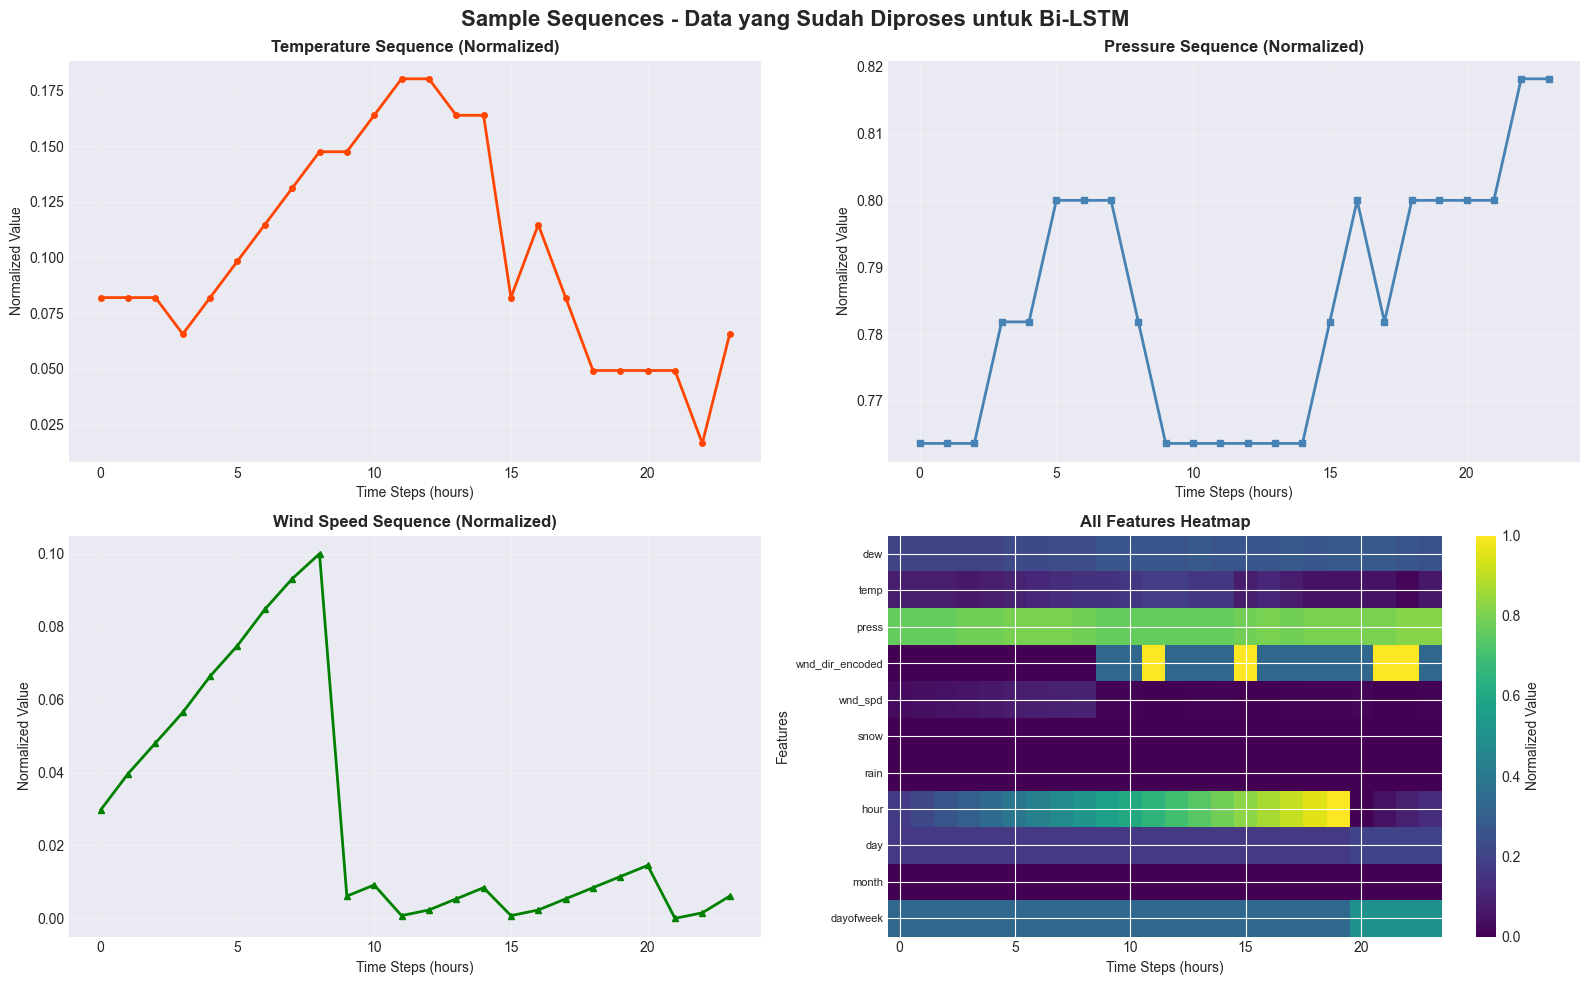


Sample visualization:
  - Input sequence shape: (24, 11)
  - Target value (normalized): 0.0302
  - Time steps: 24 hours
  - Number of features: 11


In [11]:
# Visualisasi Sample Sequence
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Sample Sequences - Data yang Sudah Diproses untuk Bi-LSTM', 
             fontsize=16, fontweight='bold')

# Ambil satu sample sequence dari training data
sample_idx = 100
sample_sequence = X_train[sample_idx]  # Shape: (24, 11)
sample_target = y_train[sample_idx]

# Plot beberapa features penting dari sequence
features_to_plot = ['temp', 'press', 'wnd_spd', 'pollution']
feature_indices = {
    'temp': feature_columns.index('temp'),
    'press': feature_columns.index('press'),
    'wnd_spd': feature_columns.index('wnd_spd'),
}

time_points = np.arange(TIME_STEPS)

# Plot Temperature
axes[0, 0].plot(time_points, sample_sequence[:, feature_indices['temp']], 
                marker='o', linewidth=2, markersize=4, color='orangered')
axes[0, 0].set_title('Temperature Sequence (Normalized)', fontweight='bold')
axes[0, 0].set_xlabel('Time Steps (hours)')
axes[0, 0].set_ylabel('Normalized Value')
axes[0, 0].grid(True, alpha=0.3)

# Plot Pressure
axes[0, 1].plot(time_points, sample_sequence[:, feature_indices['press']], 
                marker='s', linewidth=2, markersize=4, color='steelblue')
axes[0, 1].set_title('Pressure Sequence (Normalized)', fontweight='bold')
axes[0, 1].set_xlabel('Time Steps (hours)')
axes[0, 1].set_ylabel('Normalized Value')
axes[0, 1].grid(True, alpha=0.3)

# Plot Wind Speed
axes[1, 0].plot(time_points, sample_sequence[:, feature_indices['wnd_spd']], 
                marker='^', linewidth=2, markersize=4, color='green')
axes[1, 0].set_title('Wind Speed Sequence (Normalized)', fontweight='bold')
axes[1, 0].set_xlabel('Time Steps (hours)')
axes[1, 0].set_ylabel('Normalized Value')
axes[1, 0].grid(True, alpha=0.3)

# Show all features as heatmap
im = axes[1, 1].imshow(sample_sequence.T, aspect='auto', cmap='viridis')
axes[1, 1].set_title('All Features Heatmap', fontweight='bold')
axes[1, 1].set_xlabel('Time Steps (hours)')
axes[1, 1].set_ylabel('Features')
axes[1, 1].set_yticks(range(len(feature_columns)))
axes[1, 1].set_yticklabels(feature_columns, fontsize=8)
plt.colorbar(im, ax=axes[1, 1], label='Normalized Value')

plt.tight_layout()
plt.show()

print(f"\nSample visualization:")
print(f"  - Input sequence shape: {sample_sequence.shape}")
print(f"  - Target value (normalized): {sample_target[0]:.4f}")
print(f"  - Time steps: {TIME_STEPS} hours")
print(f"  - Number of features: {len(feature_columns)}")